<a href="https://colab.research.google.com/github/7Blessings7/Final-Project-CMS204/blob/main/15_Code_Bagubu_Cheddrick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

['C', 'B', 'A', 'D', 'E']


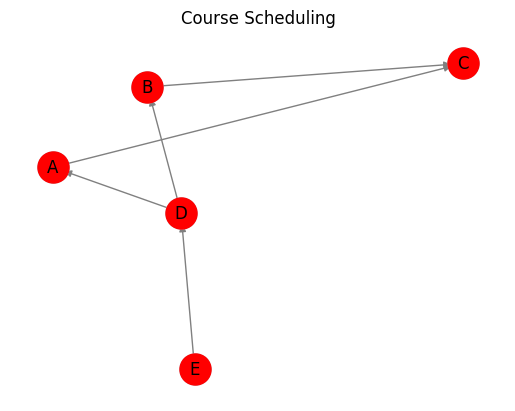

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict


class Graph:
    def __init__(self):
        self.graph = defaultdict(list)

    def add_edge(self, course, prerequisite):
        self.graph[course].append(prerequisite)

    def topological_sort_util(self, course, visited, stack):
        visited[course] = True

        for prerequisite in self.graph[course]:
            if not visited[prerequisite]:
                self.topological_sort_util(prerequisite, visited, stack)

        stack.append(course)

    def topological_sort(self):
        visited = defaultdict(bool)
        stack = []

        # Create a copy of the graph dictionary
        graph_copy = self.graph.copy()
        for course in graph_copy:
            if not visited[course]:
                self.topological_sort_util(course, visited, stack)

        return stack[::-1]

    def schedule_courses(self):
        course_order = self.topological_sort()

        schedule = []
        for course in course_order:
            if not any(prerequisite in schedule for prerequisite in self.graph[course]):
                schedule.append(course)

        return schedule


# Example usage:
course_graph = Graph()
course_graph.add_edge('C', 'A')
course_graph.add_edge('C', 'B')
course_graph.add_edge('A', 'D')
course_graph.add_edge('B', 'D')
course_graph.add_edge('D', 'E')

course_schedule = course_graph.schedule_courses()
print(course_schedule)

# Creating a directed graph for visualization
G = nx.DiGraph()

# Adding edges to the graph
for course, prerequisites in course_graph.graph.items():
    for prerequisite in prerequisites:
        G.add_edge(prerequisite, course)

# Creating a layout for the graph
pos = nx.spring_layout(G)

# Drawing the graph nodes and edges
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)
nx.draw_networkx_labels(G, pos, font_color='black')

# Highlighting the scheduled courses with red color
highlighted_nodes = course_schedule
nx.draw_networkx_nodes(G, pos, nodelist=highlighted_nodes, node_color='red', node_size=500)

# Displaying the graph
plt.title("Course Scheduling")
plt.axis('off')
plt.show()